Importing all the packages required

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

Reading files and cleaning data

In [2]:
#only drop self column
first = pd.read_csv('../work/genderactor.csv',delimiter=",")
first.drop(columns=['self'])

,GenderActor,words4,Ipercent,Wepercent
0,Female Actor,271.80000,8.167770,1.508462
1,Female Non-Actor,76.48148,4.987894,3.099274
2,Male Actor,275.20000,7.594477,1.780523
3,Male Non-Actor,136.43960,6.209729,2.214884


In [3]:
second = pd.read_csv('../work/master.csv',delimiter=",")
second.drop(columns=['Self'])

,Award,words,Ipercent,Wepercent
0,Actor in a Leading Role,308.6000,8.749190,2.073882
1,Actor in a Supporting Role,241.8000,6.120761,1.406121
2,Actress in a Leading Role,344.8000,8.410673,1.450116
3,Actress in a Supporting Role,198.8000,7.746479,1.609658
4,Animated Feature Film,126.0000,6.349206,1.904762
5,Art Direction/Production Design,109.8000,4.918033,3.460838
6,Best Picture,361.8000,6.191266,2.653400
7,Cinematography,124.2000,8.373591,1.449275
8,Costume Design,110.8000,6.137184,1.083032
9,Directing,230.6000,6.851691,1.214224


Which recipient talks for the longest

<AxesSubplot:title={'center':'Which Award Recipient Talks the Longest?'}, xlabel='Award', ylabel='Words'>

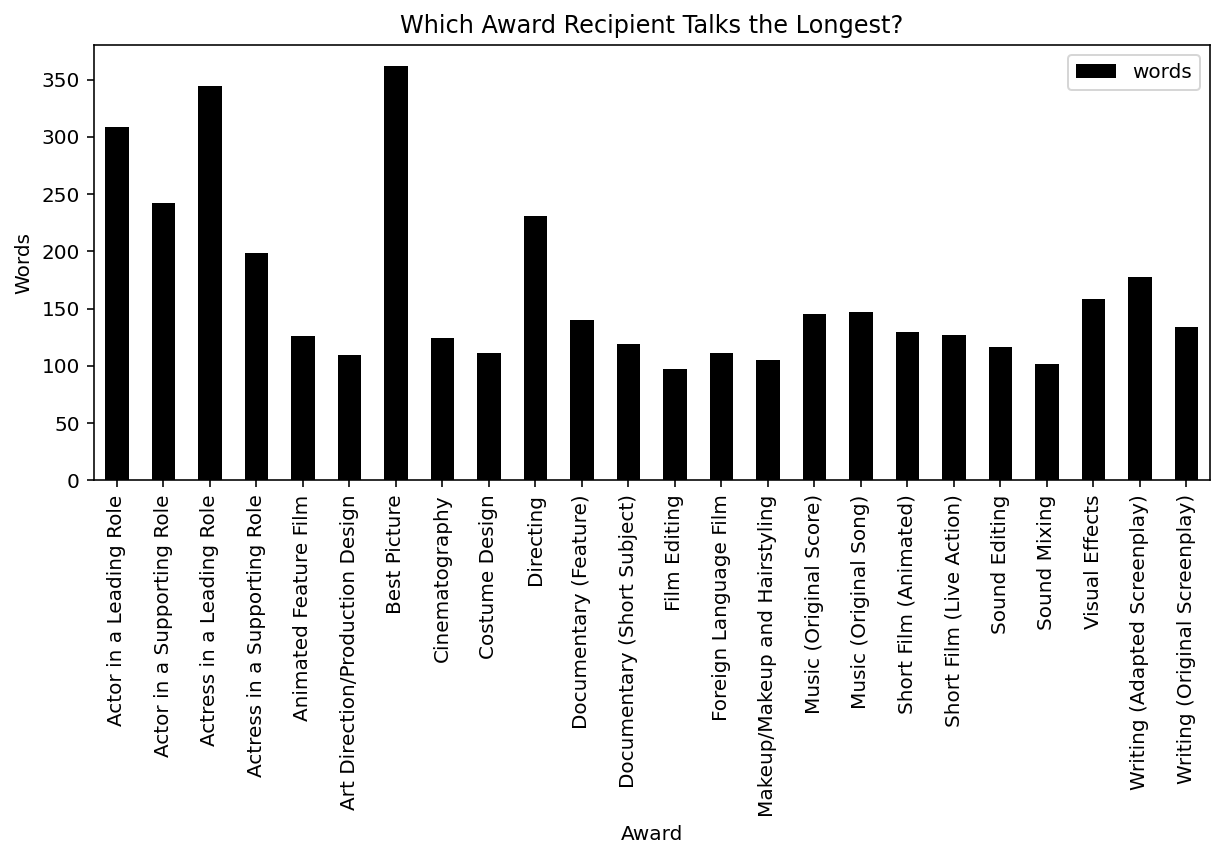

In [4]:
plot = second[['Award','words']].plot(kind='bar',color=['black'],figsize=(10,4))
plot.set_xticklabels(second['Award']);
plt.title('Which Award Recipient Talks the Longest?')
plt.xlabel('Award')
plt.ylabel('Words')
plot

I vs We Percent

In [5]:
cmap = matplotlib.cm.get_cmap("nipy_spectral", len(second['Ipercent'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

second['color']=[c[int(i-1)] for i in second['Ipercent'].astype(int)] # Adds a column to our dataframe with the color we want for each row

<AxesSubplot:title={'center':'Which Award Recipient Talks the Longest?'}, xlabel='Award', ylabel='Words'>

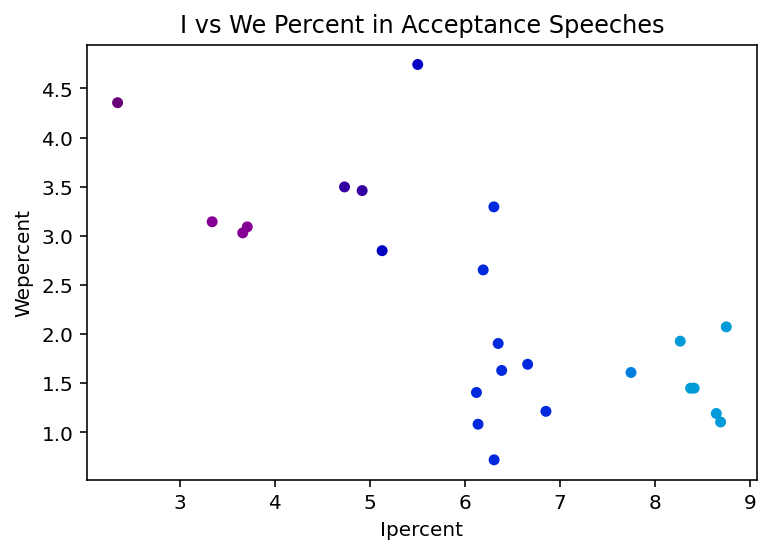

In [6]:
second.plot.scatter(x='Ipercent' , y= 'Wepercent',c=second['color'])
plt.title('I vs We Percent in Acceptance Speeches')
plot

How much more do actors talk than non actor award recipients

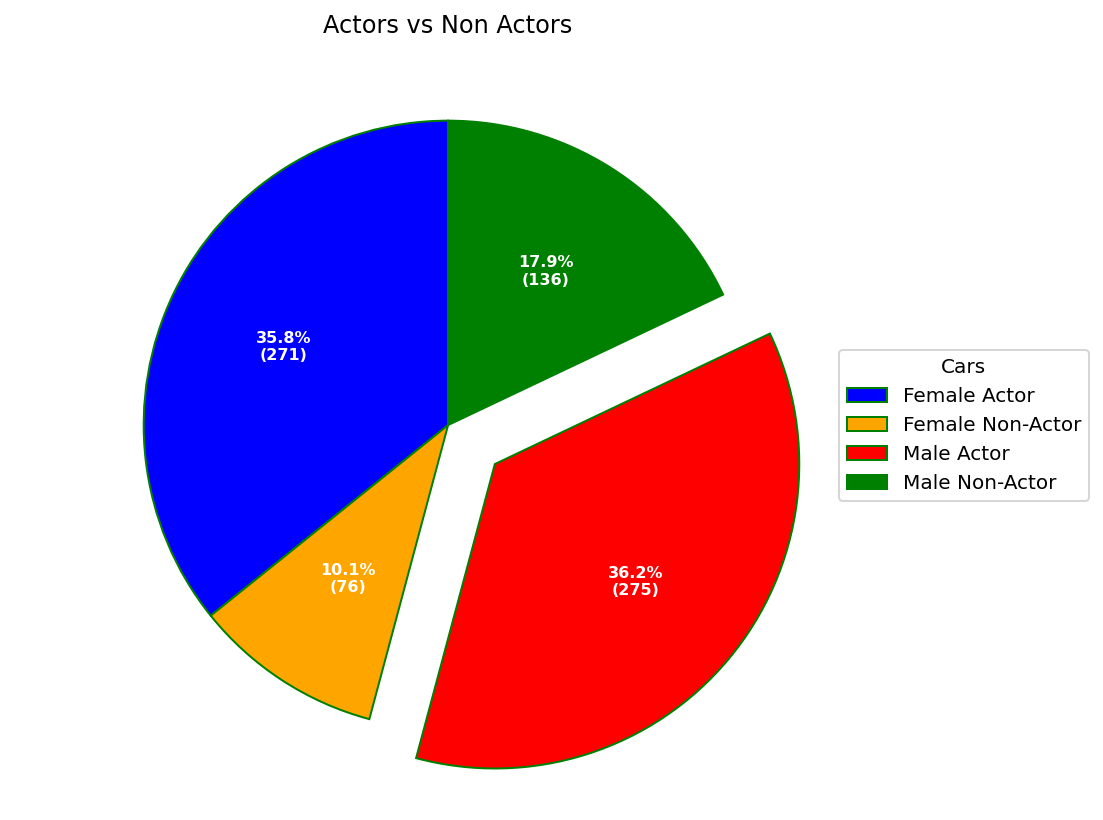

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([271.8, 76.5, 275.2, 136.4])
mylabels = ["Female Actor", "Female Non-Actor", "Male Actor", "Male Non-Actor"]
explode = [0, 0, 0.2, 0]
colors = ( "blue", "orange", "red",
          "green")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                  explode = explode,
                                  labels = mylabels,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, mylabels,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Actors vs Non Actors")
 
# show plot
plt.show()


female vs male, awards in the middle bi directional bar chart

In [8]:
third = pd.read_csv('../work/oscars_10-14.csv',delimiter=",")
third

,Oscars Year,Film Year,Actors,Gender,Played Off,Award,Speech
0,2010,2009,1.0,0.0,0.0,Actor in a Leading Role,"Oh! Thank you, Academy members! Mom and Dad, y..."
1,2010,2009,1.0,0.0,0.0,Actor in a Supporting Role,"Oscar and Penélope, that's an über bingo. I al..."
2,2010,2009,1.0,1.0,0.0,Actress in a Leading Role,Did I really earn this or did I just wear you ...
3,2010,2009,1.0,1.0,0.0,Actress in a Supporting Role,"First, I would like to thank the Academy for s..."
4,2010,2009,0.0,0.0,0.0,Animated Feature Film,"Boy, never did I dream that making a flip book..."
...,...,...,...,...,...,...,...
134,2014,2013,0.0,0.0,0.0,Sound Editing,"Wow, my heart’s beating faster than Sandra’s. ..."
135,2014,2013,0.0,0.0,0.0,Sound Mixing,Thank you Academy members and thank you very m...
136,2014,2013,0.0,0.0,0.0,Visual Effects,"On behalf of all of us, thank you so much to t..."
137,2014,2013,0.0,0.0,0.0,Writing (Adapted Screenplay),"Thank you, all. I started writing in sitcoms a..."


In [29]:
third['Words']=third['Speech'].astype(str).apply(lambda x: len(x.split()))
third

,Oscars Year,Film Year,Actors,Gender,Played Off,Award,Speech,Words,gender
0,2010,2009,1.0,0.0,0.0,Actor in a Leading Role,"Oh! Thank you, Academy members! Mom and Dad, y...",302,Male
1,2010,2009,1.0,0.0,0.0,Actor in a Supporting Role,"Oscar and Penélope, that's an über bingo. I al...",167,Male
2,2010,2009,1.0,1.0,0.0,Actress in a Leading Role,Did I really earn this or did I just wear you ...,472,Female
3,2010,2009,1.0,1.0,0.0,Actress in a Supporting Role,"First, I would like to thank the Academy for s...",116,Female
4,2010,2009,0.0,0.0,0.0,Animated Feature Film,"Boy, never did I dream that making a flip book...",128,Male
...,...,...,...,...,...,...,...,...,...
134,2014,2013,0.0,0.0,0.0,Sound Editing,"Wow, my heart’s beating faster than Sandra’s. ...",148,Male
135,2014,2013,0.0,0.0,0.0,Sound Mixing,Thank you Academy members and thank you very m...,120,Male
136,2014,2013,0.0,0.0,0.0,Visual Effects,"On behalf of all of us, thank you so much to t...",163,Male
137,2014,2013,0.0,0.0,0.0,Writing (Adapted Screenplay),"Thank you, all. I started writing in sitcoms a...",148,Male


In [30]:
third['gender']=third['Gender'].apply(lambda x: 'Female' if x==1.0 else 'Male')

In [31]:
newthird = third.drop(columns=['Oscars Year','Film Year','Actors','Played Off','Speech'])
newthird

,Gender,Award,Words,gender
0,0.0,Actor in a Leading Role,302,Male
1,0.0,Actor in a Supporting Role,167,Male
2,1.0,Actress in a Leading Role,472,Female
3,1.0,Actress in a Supporting Role,116,Female
4,0.0,Animated Feature Film,128,Male
...,...,...,...,...
134,0.0,Sound Editing,148,Male
135,0.0,Sound Mixing,120,Male
136,0.0,Visual Effects,163,Male
137,0.0,Writing (Adapted Screenplay),148,Male


In [32]:
fourth = newthird[['Award','gender','Words']].groupby(['Award','gender']).sum()

In [33]:
fourth

Words
Award                         gender       
Actor in a Leading Role       Male     1543
Actor in a Supporting Role    Male     1209
Actress in a Leading Role     Female   1724
Actress in a Supporting Role  Female    994
Animated Feature Film         Female     73
                              Male      557
Art Direction                 Female    130
                              Male      419
Best Picture                  Female     70
                              Male     1739
Cinematography                Male      621
Costume Design                Female    459
                              Male       95
Directing                     Female    233
                              Male      920
Documentary (Feature)         Female    109
                              Male      593
Documentary (Short Subject)   Female    247
                              Male      350
Film Editing                  Female     46
                              Male      440
Foreign Language Film         Female    102
                              Male      453
Makeup                        Female    174
                              Male      353
Music (Original Score)        Male      726
Music (Original Song)         Female    311
                              Male      425
Short Film (Animated)         Male      647
Short Film (Live Action)      Female     58
                              Male      575
Sound Editing                 Female     53
                              Male      645
Sound Mixing                  Male      509
Visual Effects                Male      792
Writing (Adapted Screenplay)  Male      886
Writing (Original Screenplay) Male      672

In [34]:
fourth = fourth.unstack().fillna(0)

In [35]:
fourth

Words        
gender                         Female    Male
Award                                        
Actor in a Leading Role           0.0  1543.0
Actor in a Supporting Role        0.0  1209.0
Actress in a Leading Role      1724.0     0.0
Actress in a Supporting Role    994.0     0.0
Animated Feature Film            73.0   557.0
Art Direction                   130.0   419.0
Best Picture                     70.0  1739.0
Cinematography                    0.0   621.0
Costume Design                  459.0    95.0
Directing                       233.0   920.0
Documentary (Feature)           109.0   593.0
Documentary (Short Subject)     247.0   350.0
Film Editing                     46.0   440.0
Foreign Language Film           102.0   453.0
Makeup                          174.0   353.0
Music (Original Score)            0.0   726.0
Music (Original Song)           311.0   425.0
Short Film (Animated)             0.0   647.0
Short Film (Live Action)         58.0   575.0
Sound Editing                    53.0   645.0
Sound Mixing                      0.0   509.0
Visual Effects                    0.0   792.0
Writing (Adapted Screenplay)      0.0   886.0
Writing (Original Screenplay)     0.0   672.0

In [15]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = fourth.index
column0 = fourth['Words', 'Male']
column1 = fourth['Words', 'Female']
title0 = 'Males'
title1 = 'Females'

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


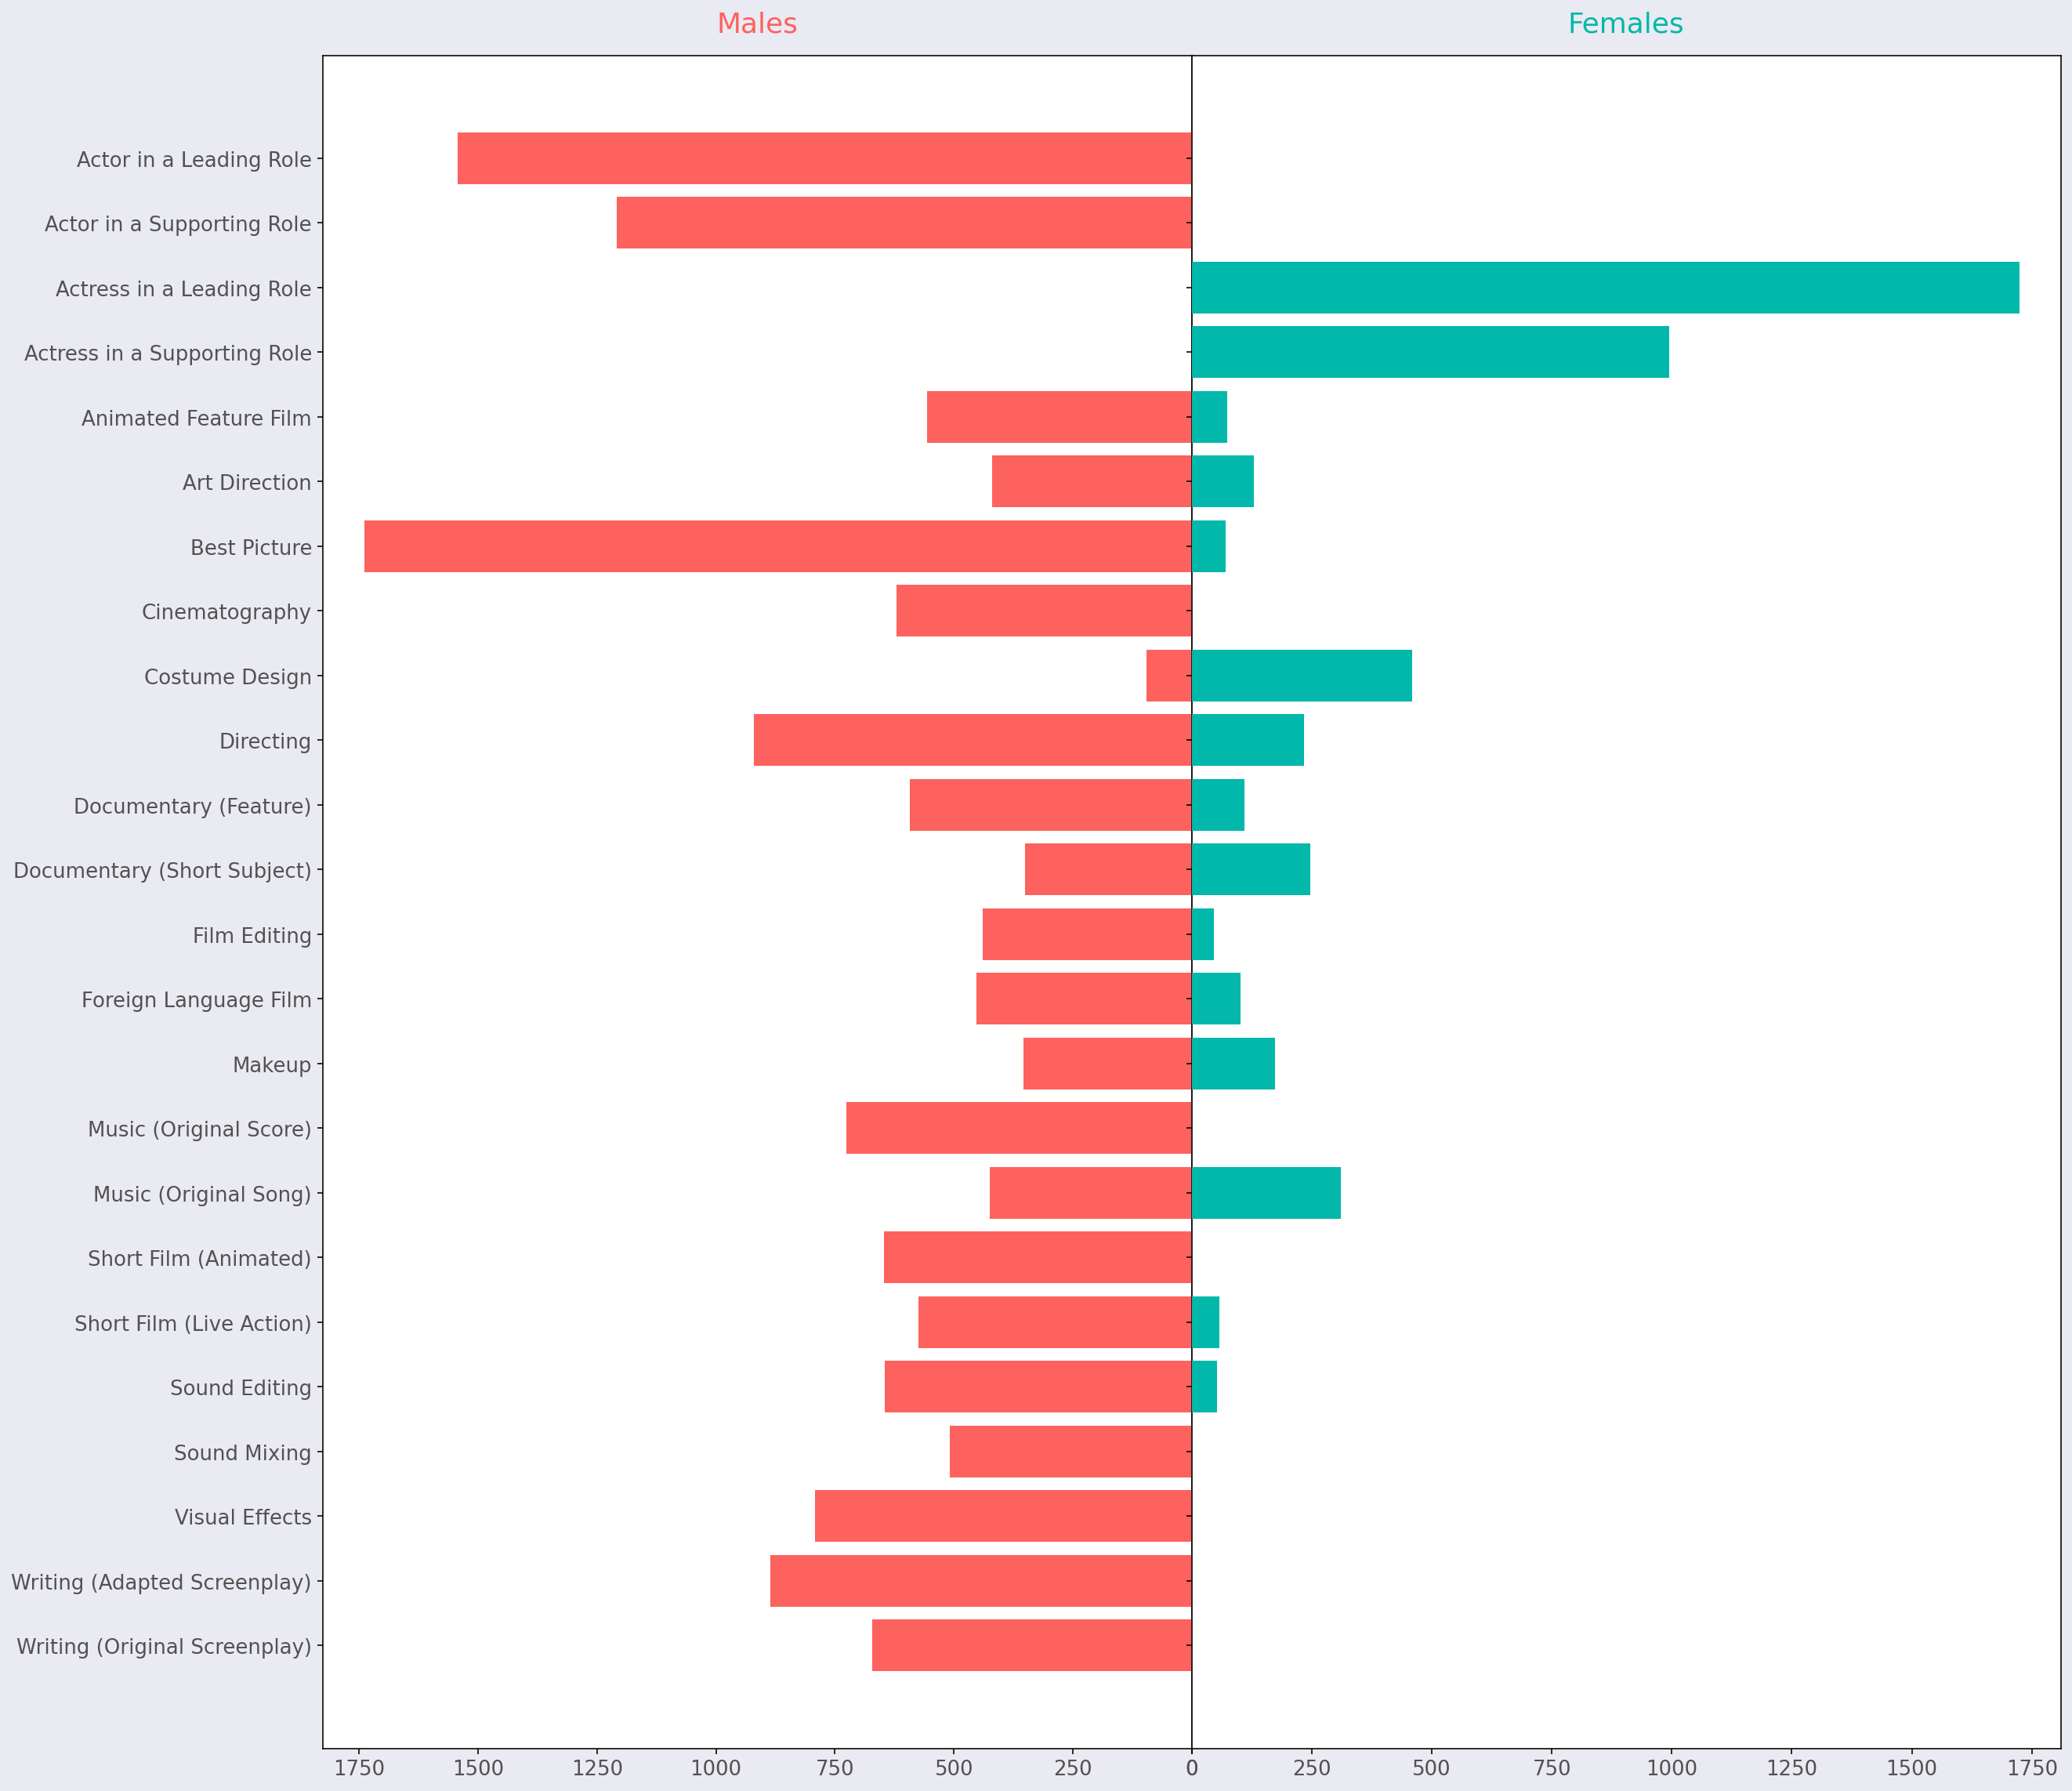

In [16]:
fig, axes = plt.subplots(figsize=(20,20), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

        
axes[0].set(yticks=fourth.index, yticklabels=fourth.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

                
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

            
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)